# Exercises

Using the repo setup directions, setup a new local and remote repository named `statistics-exercises`. The local version of your repo should live inside of `~/codeup-data-science`. This repo should be named `statistics-exercises`

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)

1. How likely is it that you roll doubles when rolling two dice?

In [3]:
# define the possible outcomes
outcomes = [1,2,3,4,5,6]

# define the number of simulations
n_sims = 100_000

# define the number of trials
n_trials = 2

In [4]:
rolls = np.random.choice(outcomes, (n_sims, n_trials))
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [5, 6],
       [5, 5],
       [6, 5]])

In [8]:
rolls = pd.DataFrame(rolls)
rolls

,0,1
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1
...,...,...
99995,3,5
99996,5,1
99997,5,6
99998,5,5


In [24]:
rolls.columns=['roll1', 'roll2']

In [26]:
rolls

,roll1,roll2
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1
...,...,...
99995,3,5
99996,5,1
99997,5,6
99998,5,5


In [28]:
doubles = rolls[rolls['roll1'] == rolls['roll2']]
doubles

,roll1,roll2
14,4,4
16,6,6
17,5,5
32,1,1
40,2,2
...,...,...
99972,2,2
99984,1,1
99990,6,6
99993,5,5


In [31]:
class Percent(float):
    def __str__(self):
        return '{:.2%}'.format(self)
    def __repr__(self):
        return '{:.2%}'.format(self)

In [35]:
print(f'The experimental chance of rolling doubles when rolling 2 dice is {Percent(len(doubles) / len(rolls))}')

The experimental chance of rolling doubles when rolling 2 dice is 16.64%


2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [62]:
# set up the experiment
# define the possible outcomes
outcomes = [1,0]

# define the number of simulations
n_sims = 100_000

# define the number of trials
n_trials = 8

n_heads = 3

In [50]:
flips = np.random.choice(outcomes, (n_sims, n_trials))
flips

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 1]])

In [51]:
flips_df = pd.DataFrame(flips)
flips_df

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,1,0
2,1,0,0,1,1,1,1,1
3,0,0,1,1,1,1,0,1
4,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
99995,0,0,1,1,1,1,1,1
99996,0,1,1,1,0,1,1,1
99997,1,1,0,1,1,0,1,0
99998,1,1,0,0,0,1,1,1


In [53]:
flips_df.sum(axis=1)

0        5
1        3
2        6
3        5
4        4
        ..
99995    6
99996    6
99997    5
99998    5
99999    3
Length: 100000, dtype: int64

In [55]:
flips_df.sum(axis=1)>3

0         True
1        False
2         True
3         True
4         True
         ...  
99995     True
99996     True
99997     True
99998     True
99999    False
Length: 100000, dtype: bool

In [56]:
more_than_3_heads = (flips_df.sum(axis=1)>3).sum()

In [58]:
more_than_3_heads

63870

In [66]:
chance_more_than_3 = more_than_3_heads/len(flips_df)

In [60]:
three_heads = (flips_df.sum(axis=1)==3).sum()
three_heads

21797

In [61]:
chance_three_heads = three_heads / len(flips_df)
chance_three_heads

0.21797

In [65]:
print(f'''The experimental chance of getting exactly

{n_heads} heads

when flipping a coin {n_trials} times

after {n_sims} simulations is:

{Percent(chance_three_heads)}
''')

The experimental chance of getting exactly

3 heads

when flipping a coin 8 times

after 100000 simulations is:

21.80%



In [46]:
flips_df.to_csv('flips_eight.csv')

In [67]:
print(f'''The experimental chance of getting more than

{n_heads} heads

when flipping a coin {n_trials} times

after {n_sims} simulations is:

{Percent(chance_more_than_3)}
''')

The experimental chance of getting more than

3 heads

when flipping a coin 8 times

after 100000 simulations is:

63.87%



3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [68]:
# setup the experiment
# define the outcomes
outcomes = ['web','web','web','DS']

# define the number of simulations
n_sims = 100_000

# define the number of trials
n_trials = 2


In [69]:
billboards = np.random.choice(outcomes, (n_sims, n_trials))
billboards

array([['web', 'DS'],
       ['DS', 'web'],
       ['web', 'web'],
       ...,
       ['DS', 'web'],
       ['web', 'web'],
       ['web', 'web']], dtype='<U3')

In [71]:
billboards_df = pd.DataFrame(billboards)

In [77]:
billboards_df[0]

0        web
1         DS
2        web
3         DS
4        web
        ... 
99995    web
99996     DS
99997     DS
99998    web
99999    web
Name: 0, Length: 100000, dtype: object

In [80]:
bills_both_ds = billboards_df[(billboards_df[0] == 'DS') & (billboards_df[1] == 'DS')]

In [81]:
chance_of_both_ds = len(bills_both_ds) / len(billboards_df)

print(f'''
The experimental chance of 

both Billboards having Data Science alumni,

if they are chosen randomly, and assuming

class sizes are fairly simular with 3 times 

as many Web Dev classes is: {Percent(chance_of_both_ds)}
''')


The experimental chance of 

both Billboards having Data Science alumni,

if they are chosen randomly, and assuming

class sizes are fairly simular with 3 times 

as many Web Dev classes is: 6.37%



4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [88]:
# let's get set up
# set the average and std

average_tarts = 3

std_tarts = 1.5

n_sims = 100_000

start_tarts = 17

days = 5

In [96]:
tart_day_df = []
tart_day_df = pd.DataFrame(tart_day_df)
for i in range(1,6):
    tart_day_df[f'day_{i}'] = pd.Series(np.random.normal(average_tarts, std_tarts, size = n_sims))
    
tart_day_df

,day_1,day_2,day_3,day_4,day_5
0,2.001760,2.403000,1.131766,4.649644,0.931287
1,0.437268,-0.305367,2.953083,0.763859,2.801115
2,2.145039,2.908359,3.939701,1.854442,3.854953
3,3.635148,-1.041474,2.905370,5.049475,4.710089
4,2.868999,3.851799,1.223297,4.236980,0.121004
...,...,...,...,...,...
99995,2.327262,5.742318,1.615623,3.202065,1.567706
99996,4.501666,4.357035,3.336938,1.754420,7.071648
99997,1.251647,3.361295,4.113088,0.093813,3.532392
99998,2.381362,4.829221,1.423411,2.727969,2.884980


In [98]:
tart_day = pd.DataFrame(np.random.normal(average_tarts, std_tarts, size = (n_sims, days)))
tart_day

,0,1,2,3,4
0,1.391557,3.547353,2.196770,0.530197,3.804988
1,3.184853,3.557854,3.904312,1.375761,2.526878
2,4.019302,4.319118,1.916003,3.544466,0.807391
3,4.325610,0.017281,4.973648,3.832555,2.141827
4,3.172564,3.629927,1.921441,2.098063,5.021935
...,...,...,...,...,...
99995,3.172344,2.837669,3.464653,4.278032,3.912513
99996,3.895868,4.309488,2.518988,2.201708,3.384971
99997,3.189470,4.820361,3.154341,3.704210,3.659003
99998,4.928662,2.600177,5.203094,5.054176,1.288524


In [99]:
tart_day_df.sum(axis=1)

0        11.117457
1         6.649958
2        14.702494
3        15.258608
4        12.302078
           ...    
99995    14.454973
99996    21.021706
99997    12.352235
99998    14.246943
99999    17.227142
Length: 100000, dtype: float64

In [102]:
bought_17 = tart_day_df.sum(axis=1)>=17

In [105]:
# the length of bought_17 where bought_17 is True
# divided by the length of tart_day_df
sold_out = len(bought_17[bought_17])/len(tart_day_df)

In [110]:
print(
f'''
The number of times the vending machine sold out

after running {n_sims} simulations/day over the course of {days} days

is {len(bought_17[bought_17])} which is {Percent(sold_out)} of the time.

This means by the end of the day on Friday, one might expect

to still be able to buy a poptart about {Percent(1-sold_out)} of the time.
''')


The number of times the vending machine sold out

after running 100000 simulations/day over the course of 5 days

is 27464 which is 27.46% of the time.

This means by the end of the day on Friday, one might expect

to still be able to buy a poptart about 72.54% of the time.



5. Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use np.random.normal to generate observations.
- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [111]:
# set up the experiment
# set the variables

# men's average height and standard deviation
man_avg = 178

man_std = 8

woman_avg = 170

woman_std = 6

n_sims = 100_000



In [187]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

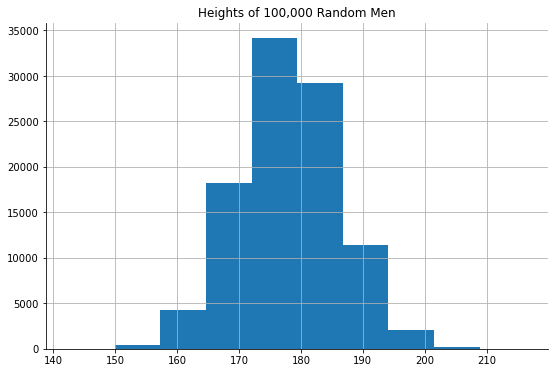

In [188]:
pd.Series(np.random.normal(man_avg, man_std, n_sims)).hist()
plt.title('Heights of 100,000 Random Men')
plt.show

<AxesSubplot:>

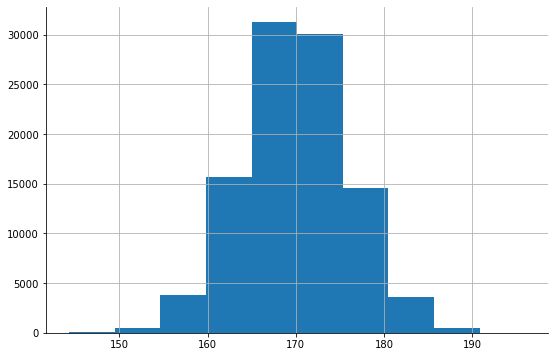

In [113]:
pd.Series(np.random.normal(woman_avg,woman_std,n_sims)).hist()

In [114]:
men = pd.Series(np.random.normal(man_avg, man_std, n_sims))
women = pd.Series(np.random.normal(woman_avg,woman_std,n_sims))

In [116]:
pairs = pd.DataFrame({'men': men, 'women': women})

In [117]:
pairs

,men,women
0,170.064200,165.476263
1,183.214993,169.176461
2,188.541722,176.187425
3,188.170371,177.213136
4,169.211538,179.174854
...,...,...
99995,175.033728,161.110901
99996,174.922291,177.260513
99997,186.179400,170.447019
99998,188.015947,175.665386


In [118]:
pairs[pairs['women'] > pairs['men']]

,men,women
4,169.211538,179.174854
13,172.571613,176.694948
31,173.862601,174.773767
35,174.938604,183.680415
41,159.326457,173.087710
...,...,...
99971,164.187488,166.792082
99975,174.483842,177.408875
99981,171.995146,175.718565
99996,174.922291,177.260513


In [119]:
taller_lady = pairs[pairs['women'] > pairs['men']]

In [120]:
chance_taller_lady = len(taller_lady)/len(pairs)

In [121]:
print(
f'''
After running {n_sims} simulations of pairing

random women with random men (steamy)

{len(taller_lady)} times the woman was taller than the man.

This means that if you pair a random man and woman

the chances that the woman is taller than the man

is about {Percent(chance_taller_lady)}
''')


After running 100000 simulations of pairing

random women with random men (steamy)

21308 times the woman was taller than the man.

This means that if you pair a random man and woman

the chances that the woman is taller than the man

is about 21.31%



In [125]:
# round_pairs = 
round(pairs['women']).astype(int)

0        165
1        169
2        176
3        177
4        179
        ... 
99995    161
99996    177
99997    170
99998    176
99999    178
Name: women, Length: 100000, dtype: int64

In [129]:
round_pairs = round(pairs).astype(int)

In [131]:
same_height = round_pairs[round_pairs['women'] == round_pairs['men']]

In [133]:
chance_same_height = len(same_height)/len(pairs)

In [134]:
print(
f'''
Interestingly, if you round to the centimeter in the same simulation

about {len(same_height)} times the man and the woman are the same height.

This leads to the conclusion that the chance of pairing a random man

with a random woman that is the same height is about {Percent(chance_same_height)}
''')


Interestingly, if you round to the centimeter in the same simulation

about 2893 times the man and the woman are the same height.

This leads to the conclusion that the chance of pairing a random man

with a random woman that is the same height is about 2.89%



6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

In [147]:
# set up the experiment

n_sims = 100_000

n_trials = 50

outcomes = np.zeros(n_sims - 1, dtype=int)

# outcomes.append(1)
outcomes = np.append(outcomes, 1)

outcomes

array([0, 0, 0, ..., 0, 0, 1])

In [148]:
crashes = np.random.choice(outcomes, (n_sims, n_trials))

In [149]:
crashes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [150]:
crash_df = pd.DataFrame(crashes)

In [152]:
crash_df.sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Length: 100000, dtype: int64

In [159]:
crash_sum = crash_df.sum(axis=1)

In [160]:
len(crash_sum)

100000

In [156]:
len(crash_sum[crash_sum == 1])

54

In [157]:
crash_sum[crash_sum > 1]

Series([], dtype: int64)

In [161]:
len(crash_sum[crash_sum == 1])/len(crash_sum)

0.00054

In [190]:
def install_success(n_students, n_sims = 100_000):
    '''
    install_success is a Function to tell us 
    the chance that a classroom of students 
    is able to install anaconda without anyone getting a corrupted version
    it takes in two arguments (n_students [, n_sims])
                    
                        n_students: the number of students in the class ;dtype = int
                        
                        n_sims: preset to 100_000 this is the number of times to run 
                        the simulation ;dtype = int
                        
    the return of the function is a float decimal between 0 and 1 representing
    the percentage chance that all the installations went off without a corruption
    '''
    # set up the experiment
    n_trials = n_students
    outcomes = np.zeros(n_sims - 1, dtype=int)
    outcomes = np.append(outcomes, 1)
    
    crashes = np.random.choice(outcomes, (n_sims, n_trials))
    crash_df = pd.DataFrame(crashes)
    crash_sum = crash_df.sum(axis=1)
    crash_chance = len(crash_sum[crash_sum == 1])/len(crash_sum)
    return 1 - crash_chance

In [166]:
install_success(50)

0.99949

In [168]:
print(
f'''
Running the experiment through 100,000 simulations

The chance of a class of size 50 installing anaconda

without anyone having a corruption issue is {Percent(install_success(50))}

in a class of 100 the chances go down to {Percent(install_success(100))}
''')


Running the experiment through 100,000 simulations

The chance of a class of size 50 installing anaconda

without anyone having a corruption issue is 99.95%

in a class of 100 the chances go down to 99.89%



- What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [169]:
print(
    f'''
    The chances that anyone will have a corruption problem
    
    even in a class of 150 students is only {Percent(1-install_success(150))}

''')


    The chances that anyone will have a corruption problem
    
    even in a class of 150 students is only 0.16%




- How likely is it that 450 students all download anaconda without an issue?

In [170]:
print(
    f'''
    The likelyhood that a class of 450 students will all
    
    successful download anaconda without any corruption issues
    
    is about {Percent(install_success(450))}
    ''')


    The likelyhood that a class of 450 students will all
    
    successful download anaconda without any corruption issues
    
    is about 99.59%
    


7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [171]:
# let's set it up
# define vars

n_sims = 100_000
n_trials = 3

outcomes = [1,1,1,1,1,1,1,0,0,0]


In [173]:
food_truck = np.random.choice(outcomes, (n_sims, n_trials))
food_truck_df = pd.DataFrame(food_truck)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0]])

In [175]:
gone_3_days = food_truck[food_truck.sum(axis=1) == 0]

In [177]:
chance_gone_3_days = len(gone_3_days)/len(food_truck)

In [178]:
print(
    f'''
    This is very odd indeed.
    
    According to experimental data, being that there is
    
    a 70% chance on any given day that at least one food truck
    
    will be at Travis Park, the chances that there isn't one
    
    for 3 days in a row is about {Percent(chance_gone_3_days)}
    ''')


    This is very odd indeed.
    
    According to experimental data, being that there is
    
    a 70% chance on any given day that at least one food truck
    
    will be at Travis Park, the chances that there isn't one
    
    for 3 days in a row is about 2.66%
    


- How likely is it that a food truck will show up sometime this week?

In [179]:
n_sims = 100_000
n_trials = 7

outcomes = [1,1,1,1,1,1,1,0,0,0]

In [180]:
food_truck = np.random.choice(outcomes, (n_sims, n_trials))
food_truck_df = pd.DataFrame(food_truck)

In [181]:
# gone_3_days = food_truck[food_truck.sum(axis=1) == 0]
eat_this_week = food_truck[food_truck.sum(axis=1) > 0]

In [182]:
chance_to_eat_this_week = len(eat_this_week)/len(food_truck)

In [185]:
print(
    f'''
    The chances that a food truck will show up at some point this week
    
    is pretty good. Bring your lunch money, \'cause there\'s a {Percent(chance_to_eat_this_week)}
    
    chance a food truck will show up sometime this week!
    ''')


    The chances that a food truck will show up at some point this week
    
    is pretty good. Bring your lunch money, 'cause there's a 97.33%
    
    chance a food truck will show up sometime this week!
    


8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [201]:
# setup time!
# set the vars

n_sims = 100_000
n_trials = 23
n_outcomes = range(366)
# I wonder if there's a random date...

In [202]:
# setup the simulator

birthdays = pd.DataFrame(np.random.choice(n_outcomes, (n_sims, n_trials)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,84,83,16,258,97,224,289,143,232,123,...,317,336,338,15,272,217,281,180,128,266
1,347,304,52,82,231,79,264,127,99,224,...,241,339,108,281,59,344,263,36,149,254
2,152,37,357,156,23,252,40,114,305,299,...,329,288,213,160,313,54,138,346,150,361
3,252,359,359,51,145,308,28,48,43,331,...,20,159,278,114,267,147,31,252,109,222
4,26,105,167,359,263,103,281,245,242,299,...,127,318,121,116,291,59,316,363,279,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24,213,275,354,257,12,230,332,161,49,...,67,243,311,194,83,113,85,67,365,90
99996,192,260,196,218,15,303,273,152,240,52,...,82,232,103,57,279,201,40,239,298,13
99997,351,202,51,171,68,165,119,20,121,280,...,308,100,352,281,135,43,193,295,171,93
99998,353,55,240,55,143,160,70,271,232,334,...,89,74,199,208,313,350,346,55,12,287


In [203]:
birthdays.nunique(axis=1)

0        23
1        22
2        23
3        21
4        23
         ..
99995    22
99996    23
99997    22
99998    21
99999    23
Length: 100000, dtype: int64

In [205]:
double_birthdays = birthdays[birthdays.nunique(axis=1)<23]
double_birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,347,304,52,82,231,79,264,127,99,224,...,241,339,108,281,59,344,263,36,149,254
3,252,359,359,51,145,308,28,48,43,331,...,20,159,278,114,267,147,31,252,109,222
9,34,55,8,194,211,105,186,124,145,32,...,358,161,59,83,39,102,235,193,343,352
10,107,327,96,44,274,19,118,108,317,148,...,65,295,220,220,204,76,275,218,297,229
13,8,350,130,123,328,19,300,312,278,108,...,288,137,281,119,194,238,138,312,241,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,205,345,326,304,359,359,150,355,229,304,...,306,358,57,241,88,254,317,362,170,0
99992,86,45,47,319,36,356,165,352,99,277,...,363,241,81,260,182,140,67,220,64,260
99995,24,213,275,354,257,12,230,332,161,49,...,67,243,311,194,83,113,85,67,365,90
99997,351,202,51,171,68,165,119,20,121,280,...,308,100,352,281,135,43,193,295,171,93


In [208]:
len(double_birthdays)/len(birthdays)

0.50638

Be sure to add, commit, and push your work.

Bonus Exercises
Mage Duel
Chuck a Luck